# Task 1

In this exercise, you are asked to build a classifier on a set of data obtained by the National Institute of Diabetes, Digestive and Kidney Diseases (National Institute of Diabetes and Digestive and Kidney Diseases). The goal is to answer the question: does a patient have diabetes based on certain diagnostic measurements included in the dataset, which is obtained from the original database by imposing several restrictions. In particular, in the data considered in the task, all patients are women of at least 21 years of Indian Pima origin.

В этом упражнении вам предлагается построить классификатор на наборе данных, полученных Национальным институтом диабета, болезней органов пищеварения и почек (National Institute of Diabetes and Digestive and Kidney Diseases). Цель состоит в том, чтобы ответить на вопрос: есть ли у пациента диабет, основываясь на определенных диагностических измерениях, включенных в набор данных, который получен из исходной базы данных наложением нескольких ограничений. В частности, в рассматриваемых в задании данных, все пациенты — женщины не менее 21 года индийского происхождения Пима.

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import os

def load_data(data_dir, link):
  if not (os.path.exists(data_dir)):
    print('========= Downloading data ... =========')
    os.system('wget ' + link + ' -O ' + data_dir + '.zip')
    os.system('unzip ' + data_dir + '.zip' + ' -d ' + data_dir)
    os.system('rm -rf ' + data_dir + '/__MACOSX')
    os.system('rm ' + data_dir + '.zip')
    print('=========       Success        =========')
  else:
    print('========= Data is already dowloaded =========')

In [3]:
data_dir1 = '/content/data'
link1 = 'https://github.com/Mark1708/ml-and-ds-online-course/raw/main/data/decision-trees-\(tpr\)/diabetes.csv.zip'
load_data(data_dir1, link1)

========= Data is already dowloaded =========


In [4]:
df = pd.read_csv(data_dir1 + '/diabetes.csv') 

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Selection of the first 650 lines:
Отбор первых 650 строк:

In [6]:
task_data = df.head(650)

Output of the number of rows in the resulting sample and related to class 0 (the patient has diabetes)

Вывод числа строк в получившейся выборке и относящихся к классу 0 (пациент болен диабетом)

In [7]:
len(task_data[task_data['Outcome'] == 0])

427

Divided data into training and test data. The first 80% of the lines are training, the rest are test.

Разделеные данных на тренировочные и тестовые. Первые 80% строк — тренировочные, остальные — тестовые.

In [8]:
train = task_data.head(int(len(task_data)*0.8))
test = task_data.tail(int(len(task_data)*0.2))

We select the predictors (the first 8 columns) and the response (Outcome):

Выделяем предикторы (8 первых столбцов) и отклик (Outcome):

In [9]:
features = list(train.columns[:8])
x = train[features]
y = train['Outcome']

Connecting the classifier DecisionTreeClassifier:

Подключем классификатор DecisionTreeClassifier:

In [10]:
from sklearn.tree import DecisionTreeClassifier

We set the parameters of the decision tree and train the model:

Задаем параметры дерева принятия решений и обучаем модель:

In [11]:
tree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf=20, #минимальное число объектов в листе
                              max_leaf_nodes=30, #максимальное число листьев
                              random_state=2020)
clf=tree.fit(x, y)

Connecting the library to visualize the tree. We save it to a file and display it on the screen.

Подключаем библиотеку для визуализации дерева. Сохраняем в файл и выводим на экран.

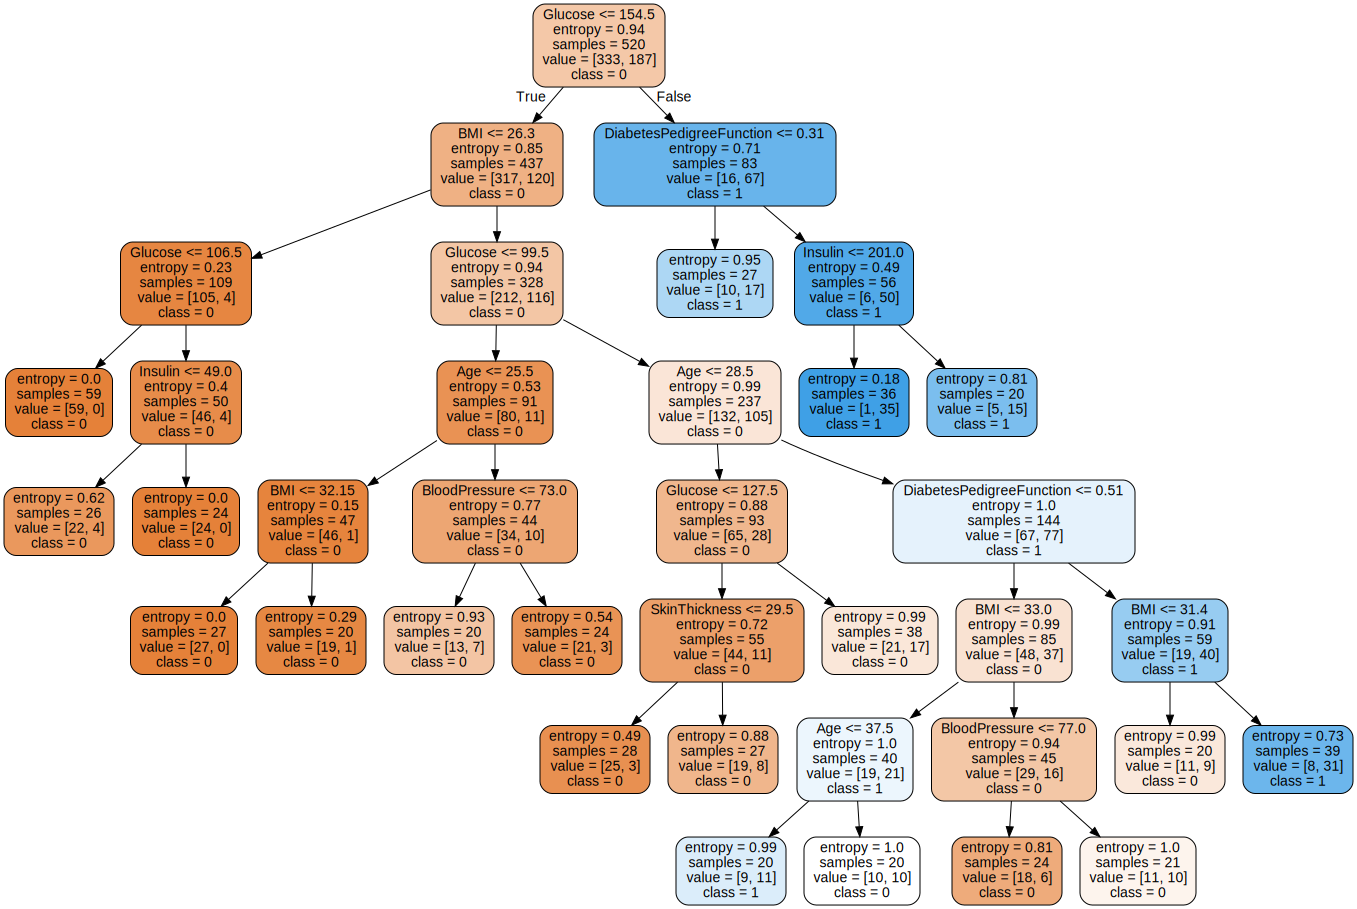

In [12]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(x.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

Output the depth of the tree:

Выводим глубину дерева:

In [13]:
clf.tree_.max_depth

7

Making a prediction for objects from the test sample:

Выполняем предсказание для объектов из тестовой выборки:

In [14]:
features = list(test.columns[:8])
x = test[features]
y_true = test['Outcome']
y_pred = clf.predict(x)

The percentage of correct answers of the classifier:

Доля правильных ответов классификатора:

In [15]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_true, y_pred), 1)

0.8

Average value of $F_1$ metrics (Macro-F1):

Среднее значение метрик $F_1$ (Macro-F1):

In [16]:
from sklearn.metrics import f1_score
round(f1_score(y_true, y_pred, average='macro'), 2)

0.73

Make a prediction for patients 743, 715, 740, 741 (line numbers are indicated, numbering from zero) from the initial data set.

Выполните предсказание для пациентов 743, 715, 740, 741 (указаны номера строк, нумерация с нуля) из начального набора данных.

In [18]:
clf.predict([df.loc[743, features].tolist()])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


1

In [19]:
clf.predict([df.loc[715, features].tolist()])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


1

In [20]:
clf.predict([df.loc[740, features].tolist()])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


1

In [21]:
clf.predict([df.loc[741, features].tolist()])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


0